In [30]:
import warnings
warnings.filterwarnings('ignore')

import math
import pandas as pd
import numpy as np

In [31]:
import yfinance as yf
bse_data = yf.download('^BSESN', start='2001-01-02', end='2024-12-10')

[*********************100%***********************]  1 of 1 completed


In [32]:
bse_data.head()

Price,Close,High,Low,Open,Volume
Ticker,^BSESN,^BSESN,^BSESN,^BSESN,^BSESN
Date,,,,,
2001-01-02,4018.879883,4028.570068,3929.370117,3953.219971,0
2001-01-03,4060.020020,4067.659912,3977.580078,3977.580078,0
2001-01-04,4115.370117,4180.970215,4109.549805,4180.970215,0
2001-01-05,4183.729980,4195.009766,4115.350098,4116.339844,0
2001-01-08,4120.430176,4206.720215,4101.529785,4164.759766,0


In [33]:
bse_data.tail()# Rename columns correctly
bse_data = bse_data.rename_axis(None).reset_index()  # Remove index name and make Date a column
bse_data.columns = ["Date", "Close", "High", "Low", "Open", "Volume"]  # Rename columns


Price,Close,High,Low,Open,Volume
Ticker,^BSESN,^BSESN,^BSESN,^BSESN,^BSESN
Date,,,,,
2024-12-03,80845.750000,80949.101562,80244.781250,80529.203125,9400
2024-12-04,80956.328125,81245.390625,80630.531250,81036.218750,7200
2024-12-05,81765.859375,82317.742188,80467.367188,81182.742188,7500
2024-12-06,81709.117188,81925.906250,81506.187500,81887.539062,8800
2024-12-09,81508.460938,81783.281250,81411.546875,81602.578125,6400


In [40]:
# Flatten MultiIndex and rename columns
#bse_data.columns = bse_data.columns.droplevel(0)  # Remove "Price"
bse_data.columns = ["Close", "High", "Low", "Open", "Volume"]  # Rename columns

# Reset the index to make "Date" a regular column
bse_data = bse_data.reset_index()


In [41]:
bse_data.head()

,Date,Close,High,Low,Open,Volume
0,2001-01-02,4018.879883,4028.570068,3929.370117,3953.219971,0
1,2001-01-03,4060.020020,4067.659912,3977.580078,3977.580078,0
2,2001-01-04,4115.370117,4180.970215,4109.549805,4180.970215,0
3,2001-01-05,4183.729980,4195.009766,4115.350098,4116.339844,0
4,2001-01-08,4120.430176,4206.720215,4101.529785,4164.759766,0


In [42]:
bse_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5897 entries, 0 to 5896
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    5897 non-null   datetime64[ns]
 1   Close   5897 non-null   float64       
 2   High    5897 non-null   float64       
 3   Low     5897 non-null   float64       
 4   Open    5897 non-null   float64       
 5   Volume  5897 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 276.6 KB


In [43]:
bse_data.isna().any()


Date      False
Close     False
High      False
Low       False
Open      False
Volume    False
dtype: bool

In [44]:
bse_data = bse_data.drop_duplicates()

bse_data['Date'] = pd.to_datetime(bse_data['Date']).dt.normalize()

bse_data = bse_data.filter(['Date', 'Close', 'Open', 'High', 'Low', 'Volume'])

bse_data.set_index('Date', inplace= True)

bse_data = bse_data.sort_index(ascending=True, axis=0)
bse_data

,Close,Open,High,Low,Volume
Date,,,,,
2001-01-02,4018.879883,3953.219971,4028.570068,3929.370117,0
2001-01-03,4060.020020,3977.580078,4067.659912,3977.580078,0
2001-01-04,4115.370117,4180.970215,4180.970215,4109.549805,0
2001-01-05,4183.729980,4116.339844,4195.009766,4115.350098,0
2001-01-08,4120.430176,4164.759766,4206.720215,4101.529785,0
...,...,...,...,...,...
2024-12-03,80845.750000,80529.203125,80949.101562,80244.781250,9400
2024-12-04,80956.328125,81036.218750,81245.390625,80630.531250,7200
2024-12-05,81765.859375,81182.742188,82317.742188,80467.367188,7500


Text(0, 0.5, 'Close Price (INR)')

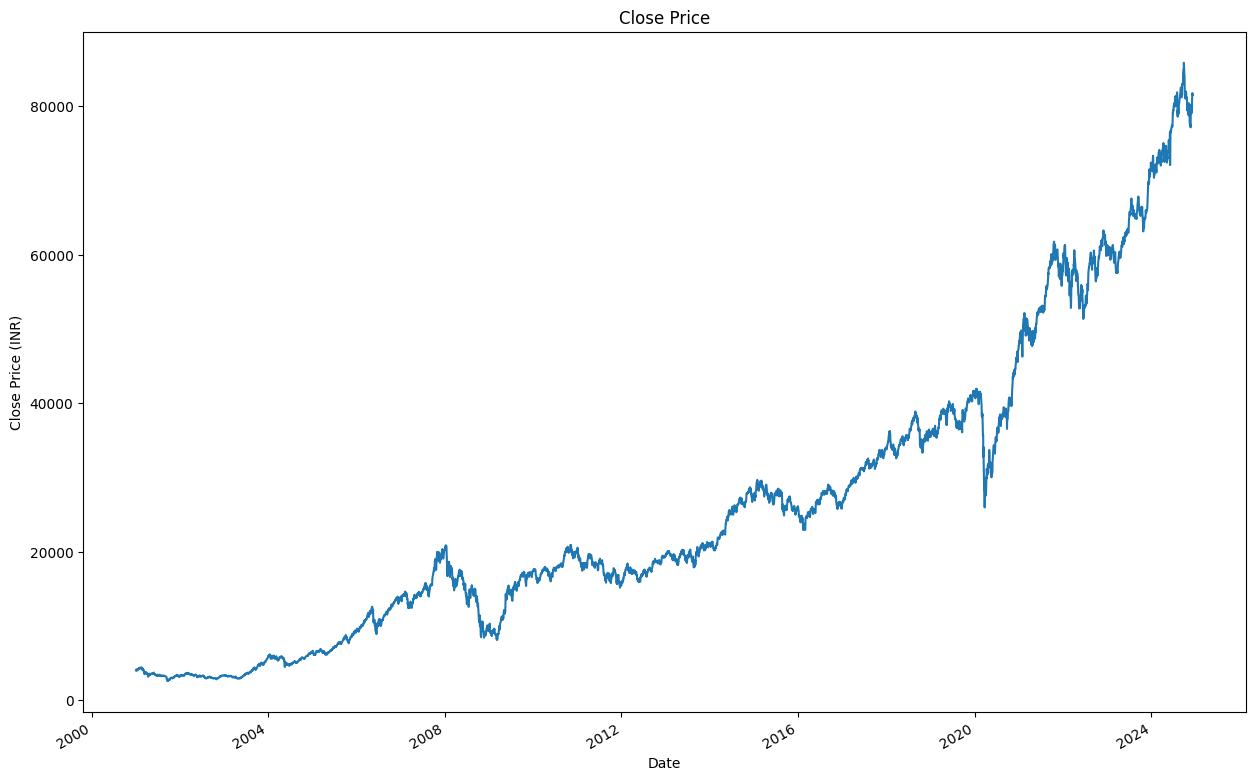

In [45]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))

bse_data['Close'].plot()


plt.title("Close Price")
plt.xlabel('Date')
plt.ylabel('Close Price (INR)')

In [46]:
bse_data["Next_Close"] = bse_data["Close"].shift(-1)  # Shift Close price to get the next day's close
bse_data["Target"] = (bse_data["Next_Close"] > bse_data["Close"]).astype(int)  # 1 if next close is higher, else 0
bse_data.dropna(inplace=True)  # Drop last row since it won't have a next day's Close value


In [47]:
X = bse_data[["Open", "High", "Low", "Close", "Volume"]]
y = bse_data["Target"]


In [48]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)


In [49]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [50]:
y_pred = model.predict(X_test)


In [51]:
from sklearn.metrics import accuracy_score, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.5406779661016949
              precision    recall  f1-score   support

           0       0.46      0.16      0.23       527
           1       0.56      0.85      0.67       653

    accuracy                           0.54      1180
   macro avg       0.51      0.50      0.45      1180
weighted avg       0.51      0.54      0.48      1180



In [53]:
latest_data = X.iloc[-1:].values  # Take the latest row as input
prediction = model.predict(latest_data)

if prediction[0] == 1:
    print("Market is predicted to go UP tomorrow.")
else:
    print("Market is predicted to go DOWN tomorrow.")


Market is predicted to go UP tomorrow.
